# MTG Analysis

### Assumptions/Notes
- 

### Imports and Setup

In [24]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
from pathlib import Path
import string
import re
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [25]:
# Setup
#lemmatizer = WordNetLemmatizer()

### Functions

In [3]:
# Iterate through a dataframe of cards and output a separate dataframe of cards in the specified color (W, B, U, R, G)
# Must use a dataframe named df_cards_trimmed.
# Returns a dataframe.
def colorExtract(color):
    df_output = pd.DataFrame()
    for card in df_cards_trimmed.iterrows():
        if card["color_identity"].contains(color):
        #if color in card["color_identity"]:
            df_output = df_output.add(card)
    return df_output

In [4]:
# Preprocess function to remove stopwords
# Returns ___
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [5]:
# Function to count words in a corpus
# Returns a dataframe with words and their frequencies
def word_counter(corpus): 
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_100 = dict(Counter(processed).most_common(100))
    return pd.DataFrame(list(top_100.items()), columns=['word', 'count'])

### Data Cleaning

In [6]:
# Import data from JSON files and remove all irrelevant data.

# I only want: multiverse ID, color identity, name, creature types, flavor text, first printing
# Drop: all non-English text, all data relating to art, etc.

In [7]:
# Load the JSON data
json_path = Path("./data/AtomicCards.json")
data = json.load(open(json_path))
cards = data['data']

# Flattening the data and extracting relevant information
cards_data = []
for card_name, card_list in cards.items():
    for card in card_list:
        scryfallOracleId = card["identifiers"].get("scryfallOracleId", None)
        color_identity = ','.join(card.get("colorIdentity", []))
        name = card["name"]
        text = card.get("text", "")
        first_printing = card.get("firstPrinting", "")
        creature_types = ','.join(card.get("subtypes", []))
        card_type = card.get("type", "")
        
        cards_data.append({
            "scryfall_oracle_id": scryfallOracleId,
            "color_identity": color_identity,
            "name": name,
            "creature_types": creature_types,
            "text": text,
            "first_printing": first_printing,
            "card_type": card_type
        })

# Creating DataFrame
df_cards = pd.DataFrame(cards_data)

In [8]:
# Display the DataFrame
df_cards

,scryfall_oracle_id,color_identity,name,creature_types,text,first_printing,card_type
0,a2c5ee76-6084-413c-bb70-45490d818374,"G,R","""Ach! Hans, Run!""",,"At the beginning of your upkeep, you may say ""...",UNH,Enchantment
1,bfa20bc7-4626-4a52-87f4-6e2763cb8ed5,U,"""Arch of Innovation""",,"""Arch of Innovation"" enters the battlefield ta...",MH3,Land
2,6fe9fd59-9cac-4572-8f94-bc19bea44f94,R,"""Ashling, Flame Dancer""","Elemental,Shaman",You don't lose unspent red mana as steps and p...,MH3,Legendary Creature — Elemental Shaman
3,c64c31f2-c1be-414e-9dff-c3b77ba97545,"B,W","""Brims"" Barone, Midway Mobster","Human,Rogue","When ""Brims"" Barone, Midway Mobster enters the...",UNF,Legendary Creature — Human Rogue
4,3cc6475d-aae9-4592-a26b-0fbb4269759d,"G,U","""Eldrazi Vanisher""","Eldrazi,Wizard","Kicker {G}, kicker {1}{U}\nWhen you cast this ...",MH3,Creature — Eldrazi Wizard
...,...,...,...,...,...,...,...
29927,4f8191e6-a6aa-4426-9014-eff4e0efee9e,"R,W","Éomer, King of Rohan","Human,Noble","Double strike\nÉomer, King of Rohan enters the...",LTC,Legendary Creature — Human Noble
29928,b2d95950-18b3-463f-94f4-299e420751dc,R,"Éomer, Marshal of Rohan","Human,Knight",Haste\nWhenever one or more other attacking le...,PLTR,Legendary Creature — Human Knight
29929,dcc349e9-399d-4f33-8131-d1801272466a,"R,W","Éowyn, Fearless Knight","Human,Knight","Haste\nWhen Éowyn, Fearless Knight enters the ...",PLTR,Legendary Creature — Human Knight
29930,1ee3753c-3b6e-4182-9305-2ab757f485f0,W,"Éowyn, Lady of Rohan","Human,Noble","At the beginning of combat on your turn, targe...",LTR,Legendary Creature — Human Noble


In [9]:
# Take only desired columns from dataframe.
df_cards_trimmed = df_cards.drop(["text", "first_printing", "card_type"], axis=1)
df_cards_trimmed

,scryfall_oracle_id,color_identity,name,creature_types
0,a2c5ee76-6084-413c-bb70-45490d818374,"G,R","""Ach! Hans, Run!""",
1,bfa20bc7-4626-4a52-87f4-6e2763cb8ed5,U,"""Arch of Innovation""",
2,6fe9fd59-9cac-4572-8f94-bc19bea44f94,R,"""Ashling, Flame Dancer""","Elemental,Shaman"
3,c64c31f2-c1be-414e-9dff-c3b77ba97545,"B,W","""Brims"" Barone, Midway Mobster","Human,Rogue"
4,3cc6475d-aae9-4592-a26b-0fbb4269759d,"G,U","""Eldrazi Vanisher""","Eldrazi,Wizard"
...,...,...,...,...
29927,4f8191e6-a6aa-4426-9014-eff4e0efee9e,"R,W","Éomer, King of Rohan","Human,Noble"
29928,b2d95950-18b3-463f-94f4-299e420751dc,R,"Éomer, Marshal of Rohan","Human,Knight"
29929,dcc349e9-399d-4f33-8131-d1801272466a,"R,W","Éowyn, Fearless Knight","Human,Knight"
29930,1ee3753c-3b6e-4182-9305-2ab757f485f0,W,"Éowyn, Lady of Rohan","Human,Noble"


In [10]:
# Make corpora for each color. Multicolored cards will be duplicated in each color.
df_corpus_W = df_cards_trimmed[df_cards_trimmed["color_identity"].str.contains("W")]
df_corpus_W = df_corpus_W["name"]
df_corpus_U = df_cards_trimmed[df_cards_trimmed["color_identity"].str.contains("U")]
df_corpus_U = df_corpus_U["name"]
df_corpus_B = df_cards_trimmed[df_cards_trimmed["color_identity"].str.contains("B")]
df_corpus_B = df_corpus_B["name"]
df_corpus_R = df_cards_trimmed[df_cards_trimmed["color_identity"].str.contains("R")]
df_corpus_R = df_corpus_R["name"]
df_corpus_G = df_cards_trimmed[df_cards_trimmed["color_identity"].str.contains("G")]
df_corpus_G = df_corpus_G["name"]

dict_corpora_strings = {
    "W": df_corpus_W.to_string(),
    "U": df_corpus_U.to_string(),
    "B": df_corpus_B.to_string(),
    "R": df_corpus_R.to_string(),
    "G": df_corpus_G.to_string()
}

In [17]:
# Remove whitespace, punctuation, newline characters, and stopwords in each color, then count the 100 most common words
words_W = process_text(dict_corpora_strings["W"])
df_count_W = word_counter(words_W)
df_count_W

,word,count
0,angel,84
1,knight,77
2,guardian,52
3,griffin,45
4,light,43
...,...,...
95,tactician,15
96,blade,15
97,hand,15
98,archon,15


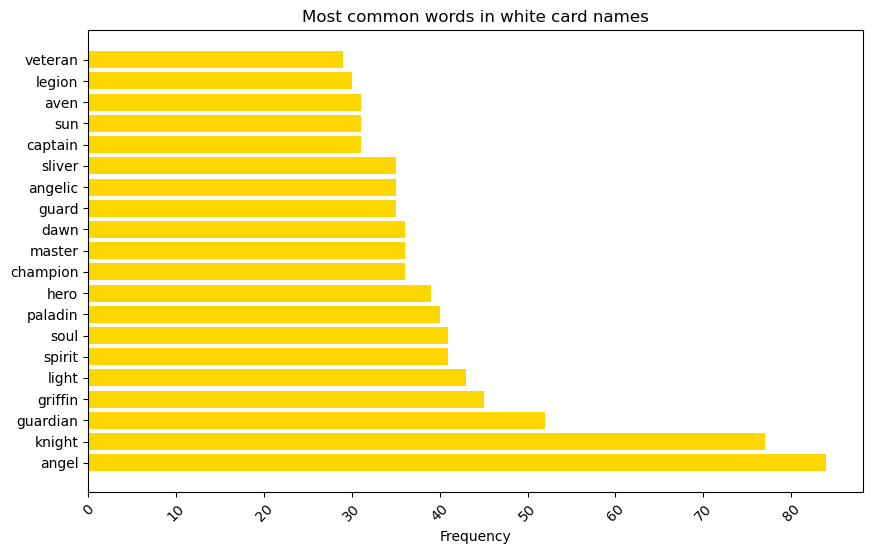

In [44]:
# plot 20 most common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_W["word"][0:20], df_count_W["count"][0:20], color="gold")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Most common words in white card names")
plt.xticks(rotation=45)
plt.show()

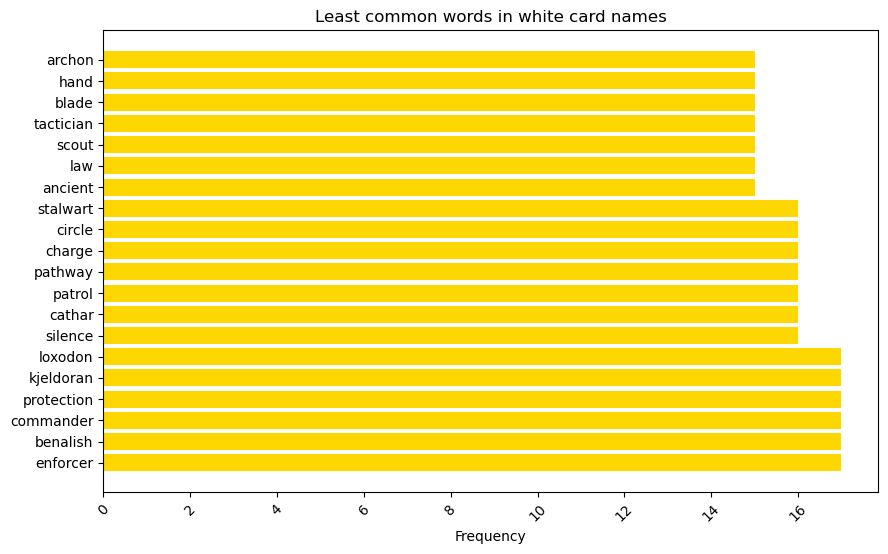

In [45]:
# plot 20 least common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_W["word"][79:99], df_count_W["count"][79:99], color="gold")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Least common words in white card names")
plt.xticks(rotation=45)
plt.show()

In [12]:
words_U = process_text(dict_corpora_strings["U"])
df_count_U = word_counter(words_U)
df_count_U

,word,count
0,drake,70
1,master,49
2,sphinx,47
3,sea,42
4,mage,37
...,...,...
95,courier,14
96,herald,14
97,curse,14
98,cryptic,14


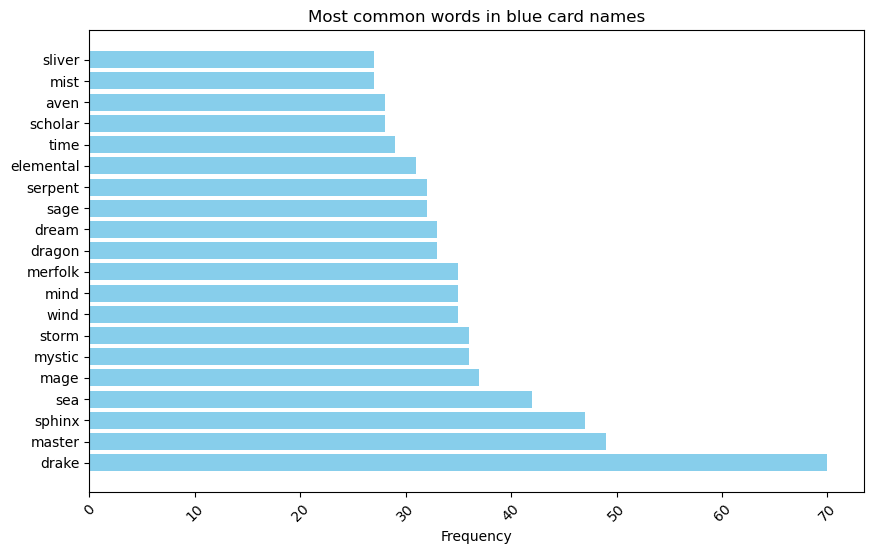

In [39]:
# plot 20 most common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_U["word"][0:20], df_count_U["count"][0:20], color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Most common words in blue card names")
plt.xticks(rotation=45)
plt.show()

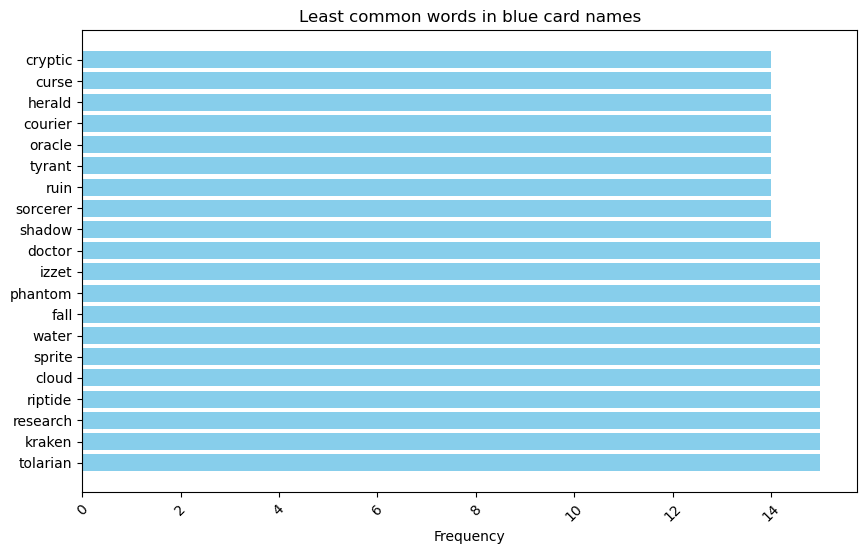

In [40]:
# plot 20 least common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_U["word"][79:99], df_count_U["count"][79:99], color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Least common words in blue card names")
plt.xticks(rotation=45)
plt.show()

In [13]:
words_B = process_text(dict_corpora_strings["B"])
df_count_B = word_counter(words_B)
df_count_B

,word,count
0,death,81
1,blood,66
2,vampire,60
3,dead,55
4,soul,52
...,...,...
95,betrayal,14
96,thief,14
97,fallen,14
98,ghost,14


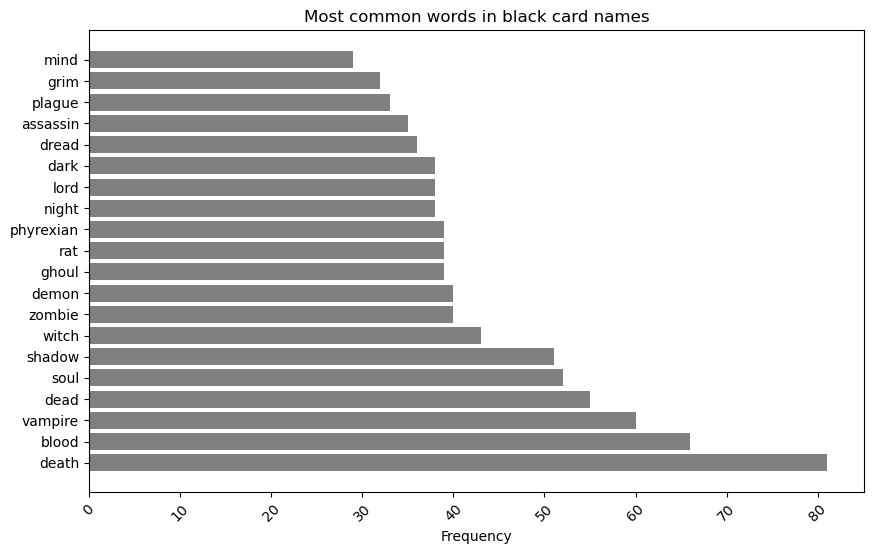

In [46]:
# plot 20 most common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_B["word"][0:20], df_count_B["count"][0:20], color="gray")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Most common words in black card names")
plt.xticks(rotation=45)
plt.show()

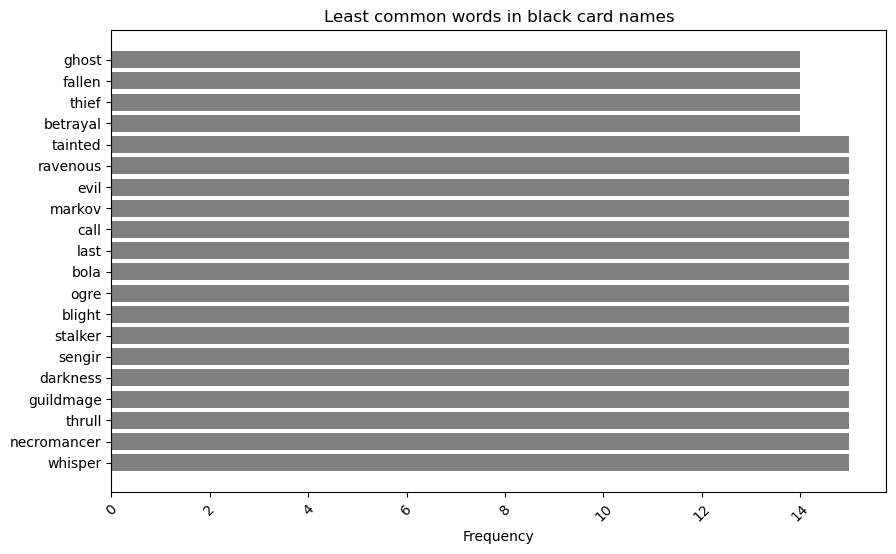

In [47]:
# plot 20 least common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_B["word"][79:99], df_count_B["count"][79:99], color="gray")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Least common words in black card names")
plt.xticks(rotation=45)
plt.show()

In [14]:
words_R = process_text(dict_corpora_strings["R"])
df_count_R = word_counter(words_R)
df_count_R

,word,count
0,goblin,213
1,dragon,106
2,fire,87
3,flame,72
4,giant,63
...,...,...
95,ravager,13
96,earth,13
97,crimson,13
98,disciple,13


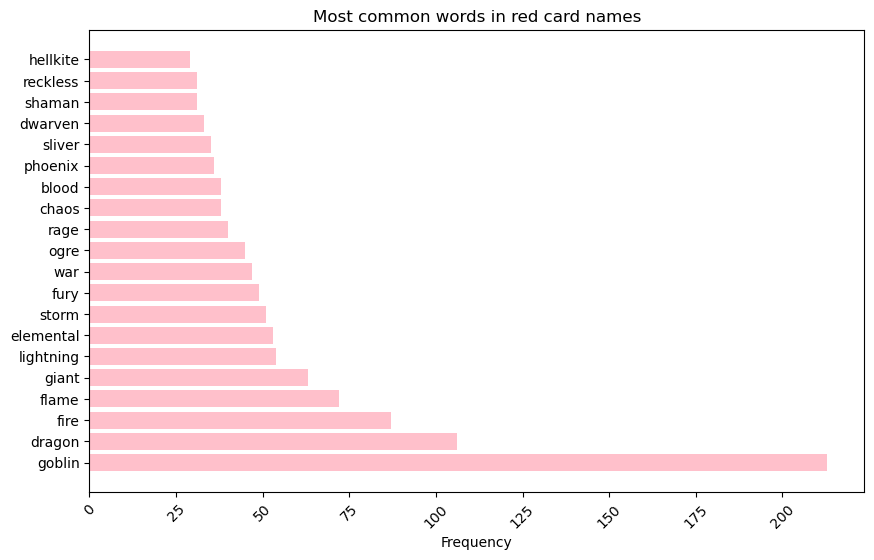

In [51]:
# plot 20 most common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_R["word"][0:20], df_count_R["count"][0:20], color="pink")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Most common words in red card names")
plt.xticks(rotation=45)
plt.show()

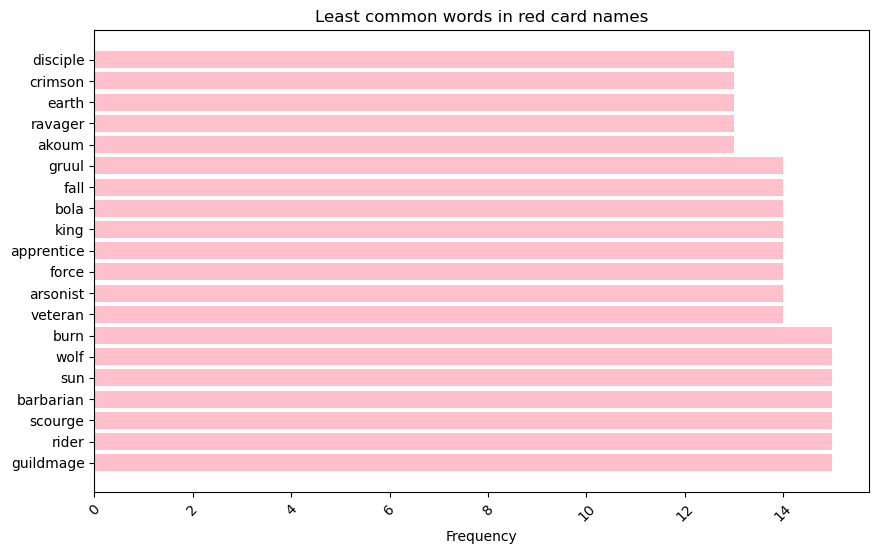

In [52]:
# plot 20 least common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_R["word"][79:99], df_count_R["count"][79:99], color="pink")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Least common words in red card names")
plt.xticks(rotation=45)
plt.show()

In [15]:
words_G = process_text(dict_corpora_strings["G"])
df_count_G = word_counter(words_G)
df_count_G

,word,count
0,wurm,66
1,wild,59
2,druid,58
3,growth,42
4,hydra,41
...,...,...
95,living,14
96,simic,14
97,mentor,13
98,hero,13


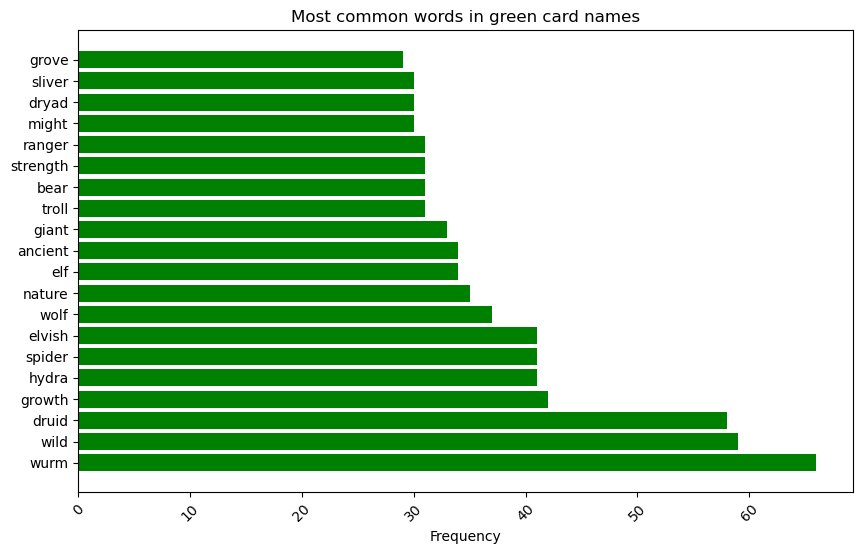

In [33]:
# plot 20 most common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_G["word"][0:20], df_count_G["count"][0:20], color="green")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Most common words in green card names")
plt.xticks(rotation=45)
plt.show()

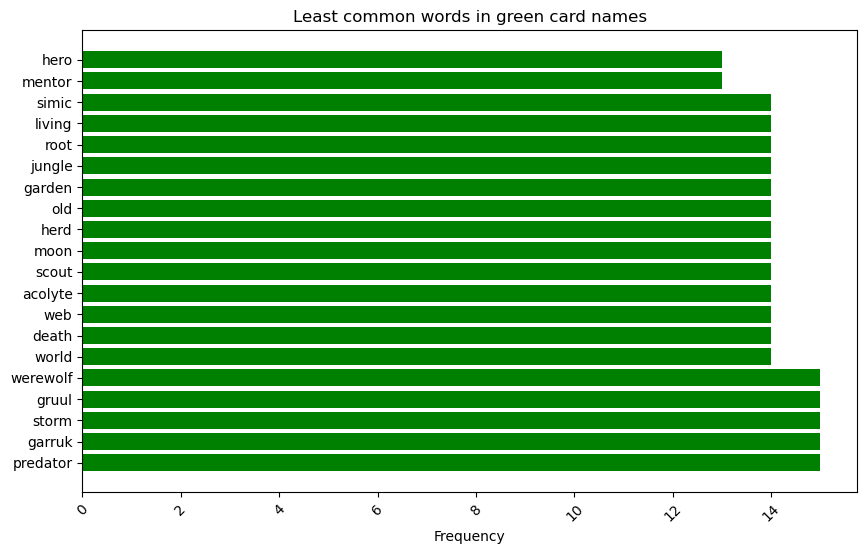

In [34]:
# plot 20 least common words
plt.figure(figsize=(10, 6))
plt.barh(df_count_G["word"][79:99], df_count_G["count"][79:99], color="green")
plt.xlabel("Frequency")
plt.ylabel("")
plt.title("Least common words in green card names")
plt.xticks(rotation=45)
plt.show()